In [1]:
from nn import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('resources/data.csv', index_col=0)

In [4]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [5]:
from tools import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y[:, np.newaxis], test_size=.33, random_state=42)

In [6]:
y_train_enc = np.where(y_train == 'B', 1, 0).astype(np.float64)
y_test_enc = np.where(y_test == 'B', 1, 0).astype(np.float64)

In [7]:
model = NeuralNetwork(loss='binary_crossentropy', verbose=True)
model.add(Dense(1, activation=Sigmoid()))

In [8]:
X_normed = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

In [9]:
X_test_normed = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

In [10]:
h = model.fit(X_normed, y_train_enc, n_epochs=10)

[10/10]: loss=0.34031 


In [11]:
from metrics import accuracy
accuracy(y_test_enc, model.predict(X_test_normed) > .5)

0.925531914893617

In [12]:
model = NeuralNetwork(loss=BinaryCrossEntropy(), verbose=True, verbose_step=25)
model.add(Dense(30, activation=Relu(), dropout_rate=.25))
model.add(Dense(1, activation=Sigmoid()))

In [13]:
h = model.fit(X_normed, y_train_enc, X_test_normed, y_test_enc, n_epochs=100, metrics=[accuracy], reinitialize=False)

[25/100]: loss=0.67102 val_loss=0.67597 accuracy=0.63947 val_accuracy=0.60638 
[50/100]: loss=0.63854 val_loss=0.64771 accuracy=0.63947 val_accuracy=0.60638 
[75/100]: loss=0.53443 val_loss=0.55074 accuracy=0.81053 val_accuracy=0.81383 
[100/100]: loss=0.35481 val_loss=0.37892 accuracy=0.95000 val_accuracy=0.92553 


In [14]:
accuracy(y_test_enc, model.predict(X_test_normed) > .5)

0.925531914893617

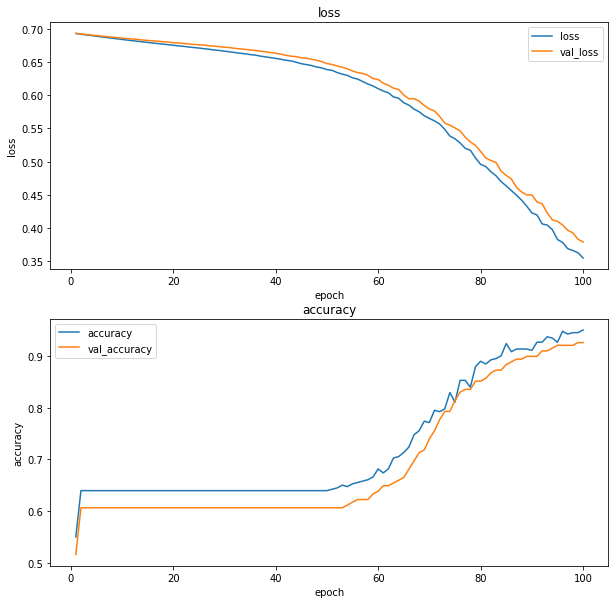

In [15]:
from viz import plot_history
plot_history(h)